<a href="https://colab.research.google.com/github/Olivier520100/EcoCompute_HackHarvard_2024/blob/main/ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# countries = {
#     "name_of_country" = {
#         "generation_model": Prophet
#         "price_model": Prophet
#         "df": pd.DataFrame
#     }
# }

In [32]:
import pandas as pd
df = pd.read_csv("wind_europe_data.csv")
df.head()

,date,generation,countryName,priceEuroPerMwh
0,2021-03-01,1.151500e+10,Austria,50.799167
1,2021-03-02,9.050000e+08,Austria,55.602917
2,2021-03-03,1.485000e+09,Austria,53.721667
3,2021-03-04,9.593000e+09,Austria,54.037083
4,2021-03-05,3.440100e+10,Austria,53.510833


In [33]:
from sklearn.preprocessing import MinMaxScaler

def scale_df(df: pd.DataFrame):
  scaler = MinMaxScaler()
  df[['generation', 'priceEuroPerMwh']] = scaler.fit_transform(df[['generation', 'priceEuroPerMwh']])
  return df

In [34]:
price_df = df.rename(columns={'date': 'ds', 'generation': 'y'})
generation_df = df.rename(columns={'date': 'ds', 'priceEuroPerMwh': 'y'})
price_df.head(1)

,ds,y,countryName,priceEuroPerMwh
0,2021-03-01,1.151500e+10,Austria,50.799167


In [35]:
generation_df.head(1)

,ds,generation,countryName,y
0,2021-03-01,1.151500e+10,Austria,50.799167


In [36]:
from prophet import Prophet

grouped = df.groupby('countryName')

# Initialize the countries dictionary
countries = []

for country, country_df in grouped:
    # Initialize a Prophet model
    generation_model = Prophet()
    price_model = Prophet()
    country_df_simplified = country_df.drop("countryName", axis=1)

    # Store the model and dataframe in the countries dictionary
    countries.append({
        "country": country,
        'price_model': price_model,
        'generation_model': generation_model,
        'df': country_df_simplified
    })

In [29]:
countries[0]["df"].head(1)

,date,generation,priceEuroPerMwh
0,2021-03-01,0.009595,0.232112


In [ ]:
# prompt: make one hot encoding for df[countryName]

import pandas as pd
# Perform one-hot encoding on the 'countryName' column
df = pd.get_dummies(df, columns=['countryName'], prefix=['country'])
df.head()

,date,generation,priceEuroPerMwh,country_Austria,country_Belgium,country_Bulgaria,country_Croatia,country_Denmark,country_Estonia,country_Finland,...,country_Poland,country_Portugal,country_Romania,country_Serbia,country_Slovakia,country_Slovenia,country_Spain,country_Sweden,country_Switzerland,country_Ukraine
0,2021-03-01,0.009595,0.232112,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021-03-02,0.000754,0.236518,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2021-03-03,0.001237,0.234793,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2021-03-04,0.007993,0.235082,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021-03-05,0.028664,0.234599,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = df.rename(columns={'date': 'ds', 'priceEuroPerMwh': 'y'})
df.head()

,ds,generation,y,country_Austria,country_Belgium,country_Bulgaria,country_Croatia,country_Denmark,country_Estonia,country_Finland,...,country_Poland,country_Portugal,country_Romania,country_Serbia,country_Slovakia,country_Slovenia,country_Spain,country_Sweden,country_Switzerland,country_Ukraine
0,2021-03-01,0.009595,0.232112,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021-03-02,0.000754,0.236518,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2021-03-03,0.001237,0.234793,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2021-03-04,0.007993,0.235082,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021-03-05,0.028664,0.234599,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwuz1v0i7/tfvg3wo1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwuz1v0i7/itzmdu47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13199', 'data', 'file=/tmp/tmpwuz1v0i7/tfvg3wo1.json', 'init=/tmp/tmpwuz1v0i7/itzmdu47.json', 'output', 'file=/tmp/tmpwuz1v0i7/prophet_modelurr3249u/prophet_model-20241012144634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Convert the first and last dates to datetime
first_test_date = pd.to_datetime(test["ds"].iloc[-1])  # Last date in test
last_test_date = pd.to_datetime(test["ds"].iloc[0])    # First date in test

# Calculate the difference in days
periods_in_days = (last_test_date - first_test_date).days

In [ ]:
periods_in_days

624

In [ ]:
future = m.make_future_dataframe(periods=200)
forecast = m.predict(future)
forecast_test = forecast[-len(test):]  # Get only the predicted values for the test period

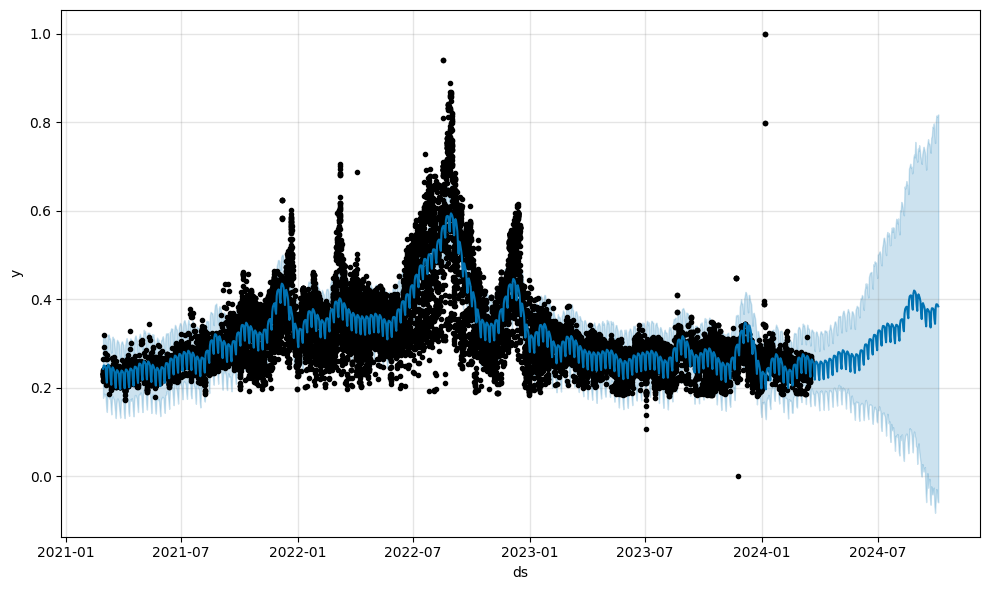

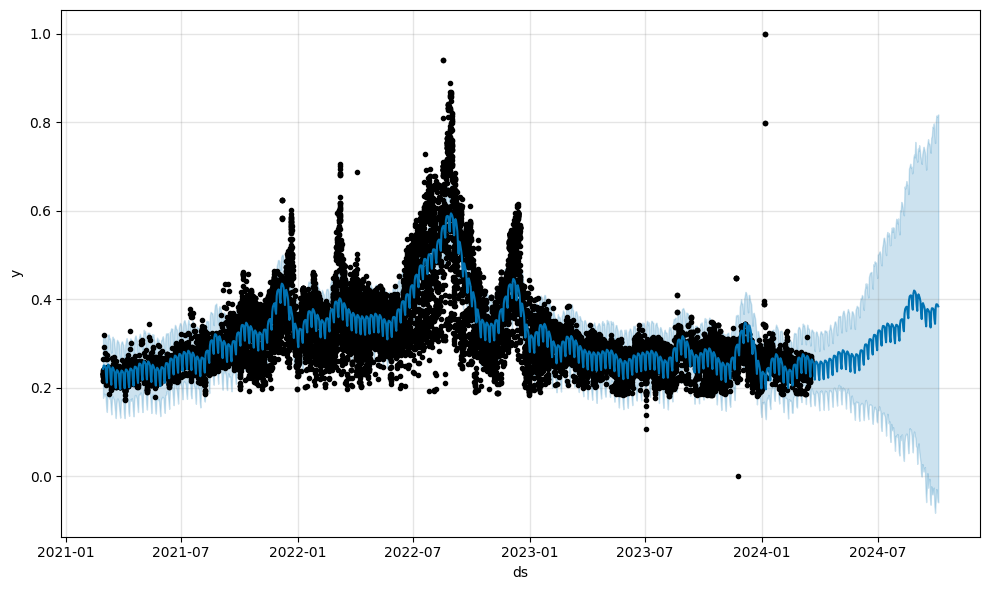

In [ ]:
m.plot(forecast_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

ValueError: Found input variables with inconsistent numbers of samples: [5877, 1314]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 113.64143011698273
RMSE: 132.82595848200913
